# Character based LSTM, for Generating Music Lyrics in Pytorch

This is a Tutorial Notebook, on how you can generate Lyrics based on a genre or an artist or anything you like using pytorch. 
I will go through getting the data and building and training the LSTM Network. 

Required Installations are Pytorch, matplotlib, numpy, pandas. I recommend you use conda

Some Code from: https://github.com/spro/practical-pytorch/blob/master/char-rnn-generation/char-rnn-generation.ipynb

## Getting the data
You will have to download the file lyrics.csv from https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics and put it in folder data

Note: if you have done this one, you can probably skip this Step

In [26]:
# import pandas for loading csv and preprocessing and np for saving for future access
import numpy as np
import pandas as pd

In [27]:
data = pd.read_csv("data/lyrics.csv") # Load the csv in a pandas Dataframe, this may take a while
data.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [28]:
# Get genres
data.genre.unique()

array(['Pop', 'Hip-Hop', 'Not Available', 'Other', 'Rock', 'Metal',
       'Country', 'Jazz', 'Electronic', 'Folk', 'R&B', 'Indie'], dtype=object)

In [29]:
# I chose Hip-Hop
genre = "Hip-Hop"

In [30]:
# eliminate all non genre results
data = data.loc[data.genre == genre]
data.head()

,index,song,year,artist,genre,lyrics
249,249,i-got-that,2007,eazy-e,Hip-Hop,(horns)...\n(chorus)\nTimbo- When you hit me o...
250,250,8-ball-remix,2007,eazy-e,Hip-Hop,"Verse 1:\nI don't drink brass monkey, like to ..."
251,251,extra-special-thankz,2007,eazy-e,Hip-Hop,"19 muthaphukkin 93,\nand I'm back in this bitc..."
252,252,boyz-in-da-hood,2007,eazy-e,Hip-Hop,"Hey yo man, remember that shit Eazy did a whil..."
253,253,automoblie,2007,eazy-e,Hip-Hop,"Yo, Dre, man, I take this bitch out to the mov..."


In [31]:
# show all artists in chronological order
print(*data.artist.sort_values().unique(), sep= ", ") # To show all artist

1000volts, 112, 18, 1982, 1982-termanology-and-statik-selektah, 2-chainz, 2-chainz-wiz-khalifa, 2-live-crew, 2-live-jews, 2-pistols, 21-savage, 213, 22-savage, 257ers, 2much, 2nd-ii-none, 2pac, 2pac-outlawz, 2win, 30h3, 31st-century, 360, 3d, 3plusss, 3rd-bass, 40-cal, 40-glocc, 40winks, 44g, 4real, 4th-avenue-jones, 4th-pyramid, 5-mic-z, 5-sterne-deluxe, 50-cent, 504-boyz, 60-east, 600breezy, 69-boyz, 6lack, 7-days-of-funk, 7-profitz, 704, 8-ball, 8ightball, 931blackboy, 99-posse, 9th-wonder, a, a-ap-ant, a-b, a-boogie, a-chal, a-f-r-o, a-game, a-k-s-w-i-f-t, a-m-sniper, a-mafia, a-p, a-trak, a-villa, a-wax, aaries, aaron-cartier, aaron-knight, aaron-smith, aasim, ab-soul, abd-al-malik, abica, abidaz, abk, abn, above-the-law, absolute, absolute-beginner, abstract-rude, ace-hood, aceyalone, acro-jazz-laboratories, action-bronson, acts-29, ad-sorry-jaynari, adam-tensta, adamn-killa, add-2, adeaze, adian-coker, adina-howard, aer, aesop-rock, afasi-filthy, afrika-bambaataa, afroman, after

dorian-concept, dorrough, dorrough-music, dose-one, dosseh, dottie-peoples, double-life, doubleswee, doughboyz-cashout, dougie-f, down-with-webster, dpg, dr-dooom, dr-dre, dr-octagon, dr-who-dat, drag-on, drake, drapht, dre, dre-dog-andre-nickatina, dream-warriors, dred-scott, dreezy, drei-ros, drevo-coolidge, drew-deezy, drew-sidora, driicky-graham, dro, droop-e, dru-hill, drumma-boy, drunken-tiger, dtweezer, dub-fx, dub-phizix, dubb, dubmatique, ducko-mcfli, duckwrth, dumbfoundead, dumbfounded, dungeon-family, dunson, durag-dynasty, durrty-goodz, dusty-mcfly, dvsn, dy, dyablo, dyme-a-duzin, e-40, e-40-too-short, e-a-ski, e-dog, e-dubble, e-jake, eaggerstunn, earl-sweatshirt, earthling, east, easy-mo-bee, eazy-e, ebony-eyez, ecco2k, echo, ed-o-g, ed-sheeran-yelawolf, edai, edan, eddie-b, eddie-james, eddie-writer, eddy-baker, edo-maajka, edorf, edward-chen, ege-rubukrngu, egyptian-lover, eightball-mjg, eighty4-fly, eins-zwo, el-general, el-lapiz-conciente, el-p, elastinen, eldo, eldor

In [32]:
# Those are really much artists, we need to elliminate some, because thay maybe 
# sing in a nother language like Deichkind or some other reason, I chose
artists = """blackstreet compton-s-most-wanted diddy dj-jazzy-jeff-the-fresh-prince dr-dre eazy-e eminem 
             the-d-o-c the-fugees 2pac 50-cent beastie-boys""".split()

In [33]:
# drop all artists, that you do not want
data = data[data["artist"].isin(artists)]
data = data.dropna()
data.head()

,index,song,year,artist,genre,lyrics
249,249,i-got-that,2007,eazy-e,Hip-Hop,(horns)...\n(chorus)\nTimbo- When you hit me o...
250,250,8-ball-remix,2007,eazy-e,Hip-Hop,"Verse 1:\nI don't drink brass monkey, like to ..."
251,251,extra-special-thankz,2007,eazy-e,Hip-Hop,"19 muthaphukkin 93,\nand I'm back in this bitc..."
252,252,boyz-in-da-hood,2007,eazy-e,Hip-Hop,"Hey yo man, remember that shit Eazy did a whil..."
253,253,automoblie,2007,eazy-e,Hip-Hop,"Yo, Dre, man, I take this bitch out to the mov..."


In [23]:
print(data.artist.unique())

['eazy-e' '50-cent' 'blackstreet' '2pac' 'compton-s-most-wanted'
 'the-d-o-c' 'diddy' 'dr-dre' 'the-fugees' 'beastie-boys' 'eminem'
 'dj-jazzy-jeff-the-fresh-prince']


In [34]:
# Save the Lyrics, to in future being able to skip these Steps
data = data.lyrics.values
np.save("data/data.npy", data)

## Prepare for training

This is where we will prepare for training our model. This includes A Dictionary for converting id to character and character to id and defing helper functions regarding data.

In [35]:
import random # for random chunk

In [36]:
# We built a dictionary class to store our character to idx and vice versa

class Dictionary:
    def __init__(self):
        self.char2idx = {}
        self.idx2char = []

    def add_char(self, char):
        if char not in self.char2idx:
            self.idx2char.append(char)
            self.char2idx[char] = len(self.idx2char) - 1
        return self.char2idx[char]
    
    def save_vals(self):
        np.save("data/dict_idx2char.npy", self.idx2char)
        np.save("data/dict_char2idx.npy", self.char2idx)
    
    def __len__(self):
        return len(self.idx2char)

In [37]:
# define dictionary and some hyper parameters
dictionary = Dictionary()
chunk_len = 200 # chunk len is on how much data the LSTM should use per epoch on traing

In [38]:
data = np.load("data.npy") # Load the data
data = np.array([a for a in data if len(a) > chunk_len+1]) # Only use lyrics which are longer than the chunk_len

# Add all characters to Dictionary
for lyrics in data:
    for i in lyrics:
        dictionary.add_char(i)

dictionary.save_vals() # Save for future use

In [40]:
print(dictionary.char2idx) # most of them wont be used

{'(': 0, 'h': 1, 'o': 2, 'r': 3, 'n': 4, 's': 5, ')': 6, '.': 7, '\n': 8, 'c': 9, 'u': 10, 'T': 11, 'i': 12, 'm': 13, 'b': 14, '-': 15, ' ': 16, 'W': 17, 'e': 18, 'y': 19, 't': 20, 'p': 21, 'a': 22, 'k': 23, 'w': 24, ',': 25, 'l': 26, 'd': 27, 'H': 28, '!': 29, 'g': 30, 'I': 31, '?': 32, 'f': 33, 'v': 34, '1': 35, 'L': 36, 'E': 37, 'z': 38, "'": 39, 'G': 40, 'K': 41, 'M': 42, 'B': 43, 'S': 44, 'j': 45, 'D': 46, 'x': 47, 'C': 48, 'N': 49, 'R': 50, '2': 51, 'V': 52, 'A': 53, 'O': 54, ':': 55, ']': 56, 'Y': 57, '3': 58, 'F': 59, '8': 60, 'q': 61, 'P': 62, '4': 63, '0': 64, '5': 65, '"': 66, 'J': 67, '9': 68, '6': 69, 'U': 70, '+': 71, '@': 72, '{': 73, '*': 74, 'X': 75, '}': 76, 'Q': 77, '[': 78, 'Z': 79, '&': 80, '7': 81, '>': 82, '`': 83, '/': 84, '\x7f': 85, '%': 86, ';': 87, '_': 88, '\t': 89, 'Ã': 90, '©': 91, '#': 92, '~': 93, 'ï': 94, '»': 95, '¿': 96, '$': 97, '=': 98, '±': 99, '¢': 100, 'â': 101, '\x84': 102, '\x83': 103, 'Â': 104, '¡': 105, '\x80': 106, '\x9e': 107, '¨': 108, '^

In [42]:
# for training we define a function which randomly samples a passage out of our lyrics with character len chunk_len

def random_chunk():
    lyrics = data[np.random.randint(0, len(data))]
    start_index = random.randint(0, len(lyrics) - chunk_len)
    end_index = start_index + chunk_len + 1
    return lyrics[start_index:end_index]

print(random_chunk())

a hold my hand mister!
Prentend she's your little sister, little sister,
Prony little dickta(?),
Might aswell take a whipped cream with ya,
And when you see her make sure you get a picture,
We could tr


## Build the Model

Now comes the fun part. We will be building our model. It is an LSTM model. That's almost all there's to it

In [43]:
# import torch
import torch
import torch.nn as nn
from torch.autograd import Variable

In [44]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size) # This is the encoding layer
        self.lstm = nn.LSTM(hidden_size, hidden_size, n_layers) # if you want a standard RNN use nn.GRU instead of nn.LSTM
        self.decoder = nn.Linear(hidden_size, output_size) # and this decodes the out from the lstm to a character prediction
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1)) # at first we pass the input throught the encoder
        output, hidden = self.lstm(input.view(1, 1, -1), hidden) # then through the lstm
        output = self.decoder(output.view(1, -1)) # And then through the the decoder
        return output, hidden # We need to store the hidden for future use

    def init_hidden(self):
        # If you're using GRU, delete the 2
        return Variable(torch.zeros(2, self.n_layers, 1, self.hidden_size)) # This just is the first hidden 
                                                                            # which gets pat in the Network
        

## Defining helper functions for training
In this step were right before being able to traing our Model. We will built an function for getting data which will be able to be interpred by the machine, a training and a function for evaluating the network

In [45]:
# These functions convert random_chunk to numerical data and inputs and targets. First of all we will need a 
# function to convert to numbers

def char_tensor(string):
    tensor = torch.zeros(len(string)).long() # just gives a Starting point
    for c in range(len(string)):
        tensor[c] = dictionary.char2idx[string[c]] # uses our dictionary to convert the character to numbers and 
                                                   # puts it in out tensor
    return Variable(tensor)

print(char_tensor('abcDEF'))

tensor([22, 14,  9, 46, 37, 59])


In [46]:
# This combines char_tensor and random_chunk to one function

def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1]) # inputs for training function
    target = char_tensor(chunk[1:]) # targets for training function
    return inp, target

In [61]:
# This is the evaluation function. It takes a starting string, the len of the prediction in characters and 
# how sure the net is about the characters it predicts. If to low the net will predict quite boring text and if to high
# the output will make no sense

def evaluate(decoder, prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = dictionary.idx2char[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [49]:
import time, math

# function to use during printing the training process
def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [55]:
# the train function for one step, decoder is the rnn, critereon the loss and decoder_optimizer the optimizer
def train(inp, target, decoder, criterion, decoder_optimizer):
    hidden = decoder.init_hidden() # inits the staring hidden state
    decoder.zero_grad() # zero grad the model
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden) # predict the next character
        loss += criterion(output, target[c].view(1)) # add to our loss the loss from this char

    # update the net
    loss.backward()
    decoder_optimizer.step()

    return loss.data[0] / chunk_len # return the average character loss

## GETTING TO THE FUN STUFF!!
Here we will train our model and explore it

In [75]:
# If you train a little longer the model will perform even better
n_epochs = 4000
print_every = 100
plot_every = 10
hidden_size = 100 # the hidden layer size of the RNN
n_layers = 1 # teh number of layers in LSTM
lr = 0.007
model_name = "lstm_1000"

rnn = RNN(len(dictionary), hidden_size, len(dictionary), n_layers) # Our model with the amount of characters in our 
                                                                   # dict as input and output
rnn_optimizer = torch.optim.Adam(rnn.parameters(), lr=lr) # Our optimizer will be Adam
loss = nn.CrossEntropyLoss() # As our Loss we will be using CrossEntropyLoss

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    this_loss = train(*random_training_set(), rnn, loss, rnn_optimizer)
    loss_avg += this_loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, this_loss))
        print(evaluate(rnn, 'Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

/Users/peerrheinboldt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


 26s (100 2%) 2.3622]
Whe simee row wofhe tre mepf the loven'll to't atp mind storl no to they thin's to ghothin't on teren  

 55s (200 5%) 2.3449]
Wheng fut yo ored I sound I get treop the done let fout ont sme
I bout fe gean tory to it fut wifl me  

 22s (300 7%) 1.9452]
Wh I he we lotinct ain' fungs and (rout a the be a
When your thary my my mo be Oout on all the I mor i 



IndexError: index 199 is out of bounds for dimension 0 with size 199

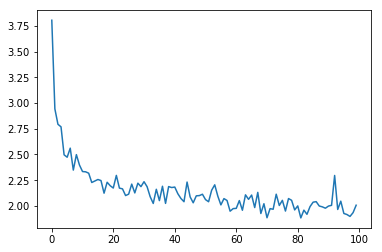

In [65]:
# Plot the history of losses, to visualize Training
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [66]:
# saving the model, you need to make folder saved_models
torch.save(rnn, "saved_models/{}.pt".format(model_name))

/Users/peerrheinboldt/anaconda/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# Now is your Turn
### You can now play around with hyperparameters and generate text

In [67]:
print(evaluate(rnn, "AI on the remix!", 1000, 0.6))

AI on the remix!
No off it now the pop in time and want plack to has the cow was hearsing and the frong up in the work
I'm up on my the grie act now, I'm so way bame how and every I'll there hood this pease the don't lookin' on this bad this the soull the bitsull the fight the back to so may to stay
Dor the dow motesting and that the plack they him the suy vickin' like the frick
I'm don't canit
You they my trike drion then with want down
I'm to in this you like the how you know you somesting not the bad they I know)
So be want the know his this the gong the shit the bay off dight, the get this as the he may with ass readger with the bittin' to heall the bet you bitting off too
And I seed mebesting a reack frise a caused my bet my this you know and out and niggas the know love in that time the deed to reaght
And the comy reabeficting that this want it to shoy pay pown, the like you frount Make all the pack a gland my the want
I want they and the me
You'd make to be not it like my me
I'd